In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris(as_frame=True)

In [2]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
df=iris['data']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
species=iris['target']
species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Normalize Data

In [5]:
df_norm = (df-df.mean())/df.std()

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
Z=pca.fit_transform(df_norm)

In [7]:
pca.explained_variance_

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [8]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [9]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

## Visualization

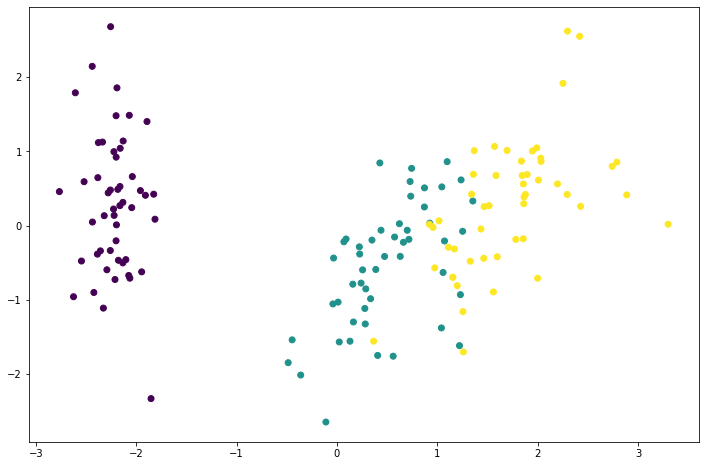

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=species)

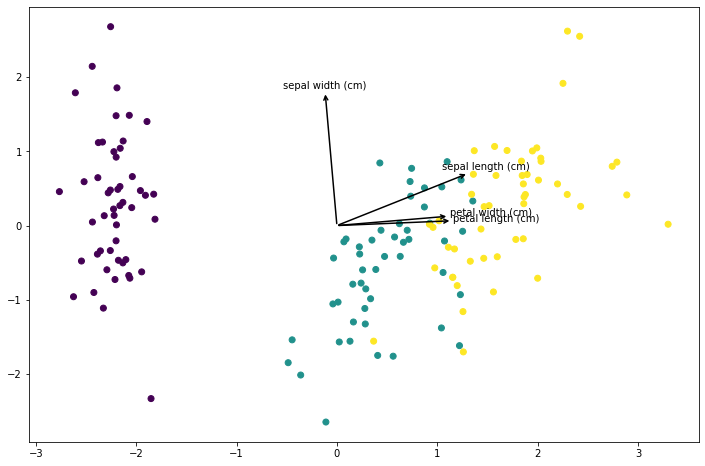

In [11]:
factor=pca.components_[:2,:].T
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=species)
for i in range(4):
    plt.annotate(df.columns[i],xy=(0,0),xytext=(factor[i]*2),arrowprops={'lw':1.5, 'arrowstyle':'<-'})